In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
hi= pd.read_csv('C:\\Users\\Iqraa\\Downloads\\insurance.csv')

In [2]:
hi.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
hi.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

there is no "NaN"in the data


In [4]:
from sklearn.preprocessing import LabelEncoder
#sex
le= LabelEncoder()
le.fit(hi.sex.drop_duplicates()) 
hi.sex = le.transform(hi.sex)
# smoker or not
le.fit(hi.smoker.drop_duplicates()) 
hi.smoker = le.transform(hi.smoker)
#region
le.fit(hi.region.drop_duplicates()) 
hi.region = le.transform(hi.region)

In [5]:
hi.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

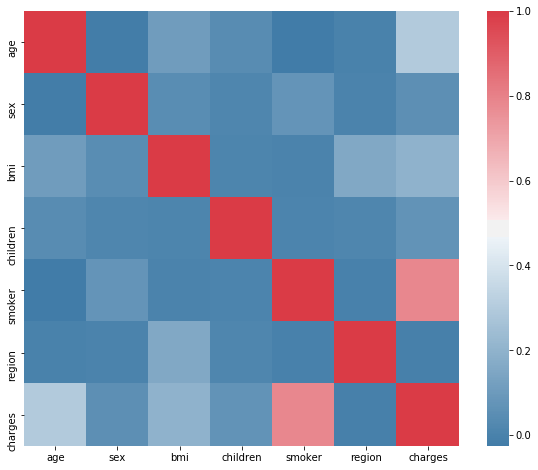

In [6]:
f,ax = pl.subplots(figsize=(10, 8))
corr = hi.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

A strong correlation is observed only with the smoking patient.

the distribution of bill charges and patients spend amount on treatment on average.

In [56]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

Loading BokehJS ...

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

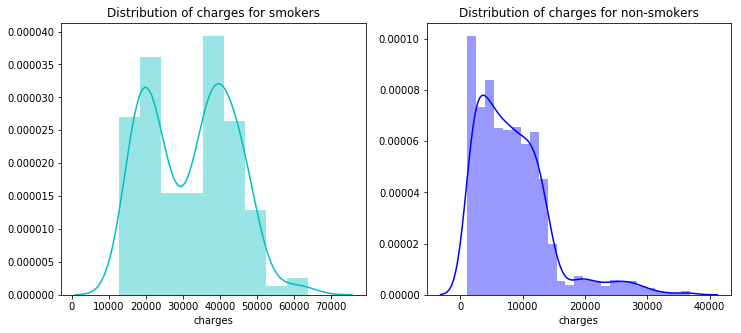

In [9]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(hi[(hi.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(hi[(hi.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment. 

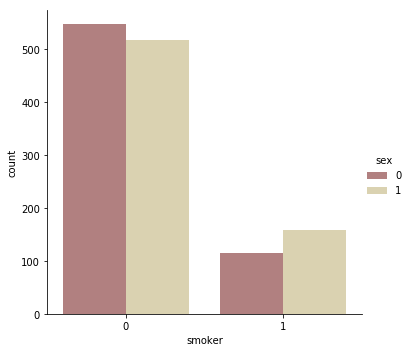

In [10]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=hi)

Please note that women are coded with the symbol " 1 "and men - "0".  
Also there are more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. 
. 

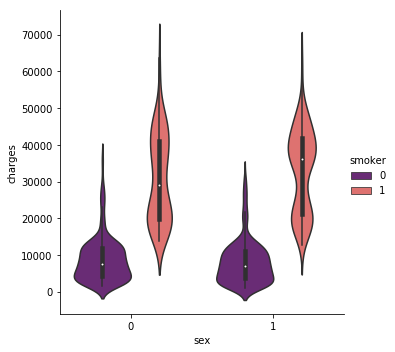

In [11]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=hi, palette = 'magma')

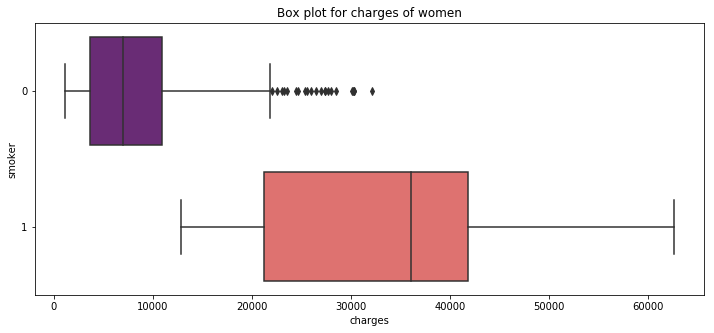

In [12]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data=hi[(hi.sex == 1)] , orient="h", palette = 'magma')

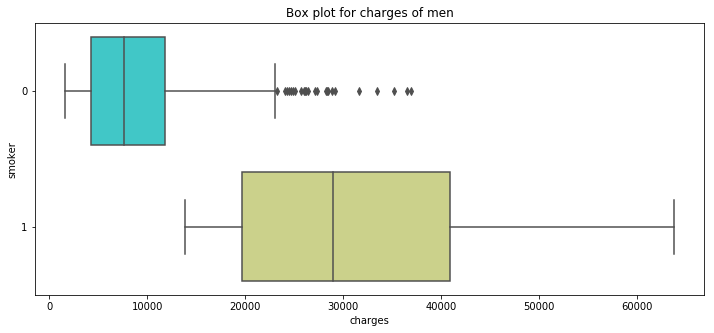

In [13]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =hi[(hi.sex == 0)] , orient="h", palette = 'rainbow')

 look at how age affects the cost of treatment, check the age in our data set.

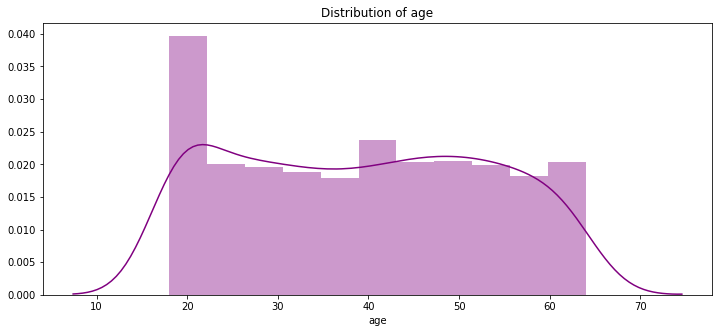

In [17]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(hi["age"], color = 'purple')

We have patients under 20 in our data set. Im 18 years old. This is the minimum age of patients in our set. The maximum age is 64 years. 


Text(0.5, 1.0, 'smokers and non-smokers (18 years old)')

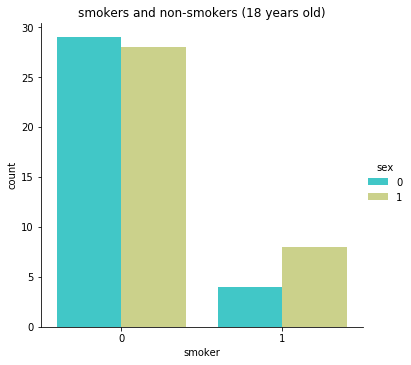

In [18]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=hi[(hi.age == 18)])
pl.title("smokers and non-smokers (18 years old)")

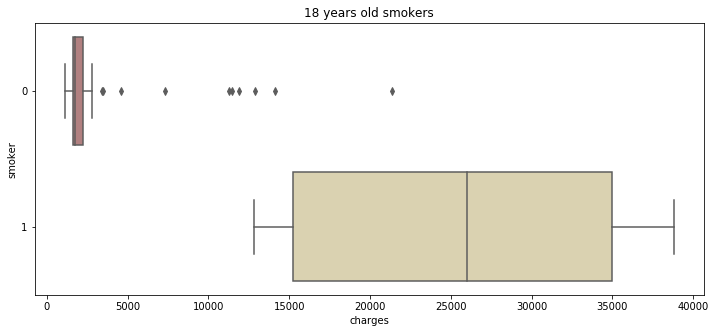

In [20]:
pl.figure(figsize=(12,5))
pl.title("18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = hi[(hi.age == 18)] , orient="h", palette = 'pink')

even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents.

Text(0.5, 1.0, 'charges and age for non-smokers')

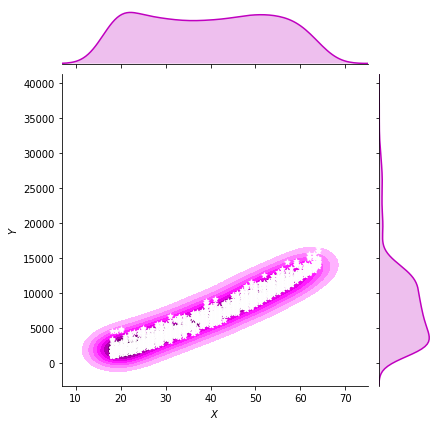

In [23]:
g = sns.jointplot(x="age", y="charges", data =hi[(hi.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

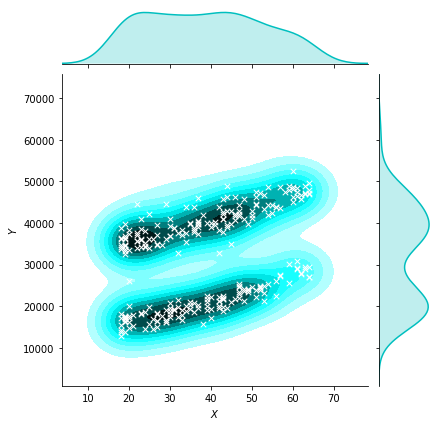

In [24]:
g = sns.jointplot(x="age", y="charges", data =hi[(hi.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="x")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [58]:
#non - smokers
p =figure(plot_width=500, plot_height=450)
p.circle(x=hi[(hi.smoker == 0)].age,y=hi[(hi.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)
show(p)

In [57]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=hi[(hi.smoker == 1)].age,y=hi[(hi.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

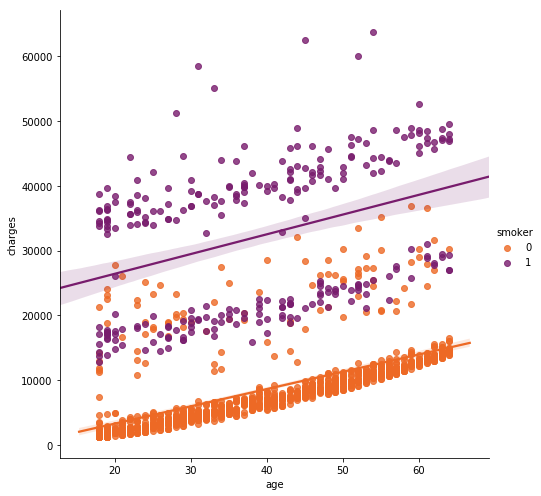

In [35]:

sns.lmplot(x="age", y="charges", hue="smoker", data=hi, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age. 


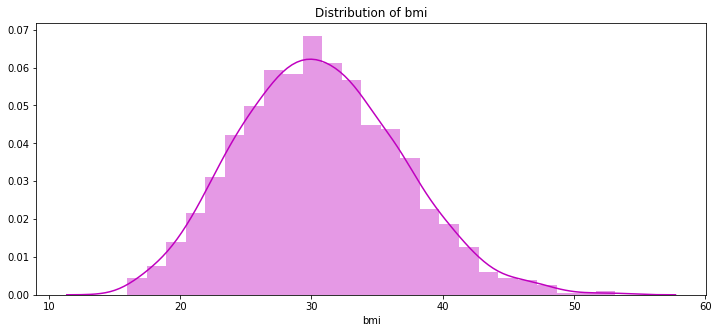

In [36]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(hi["bmi"], color = 'm')

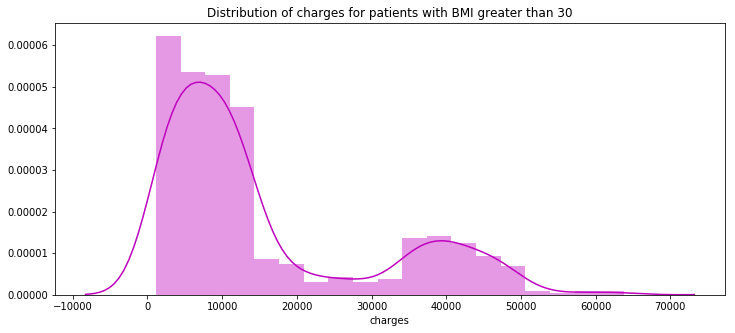

In [38]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(hi[(hi.bmi >= 30)]['charges'], color = 'm')

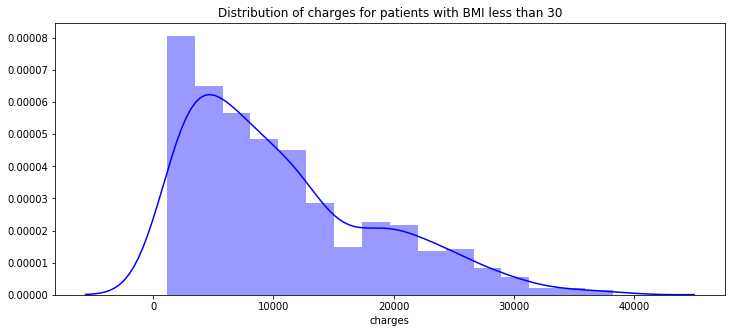

In [39]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(hi[(hi.bmi < 30)]['charges'], color = 'b')

Patients with BMI above 30 spend more on treatment!

Text(0.5, 1.0, 'Distribution of bmi and charges')

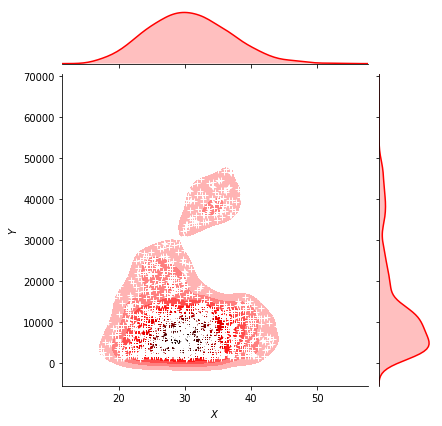

In [40]:
g = sns.jointplot(x="bmi", y="charges", data =hi,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')


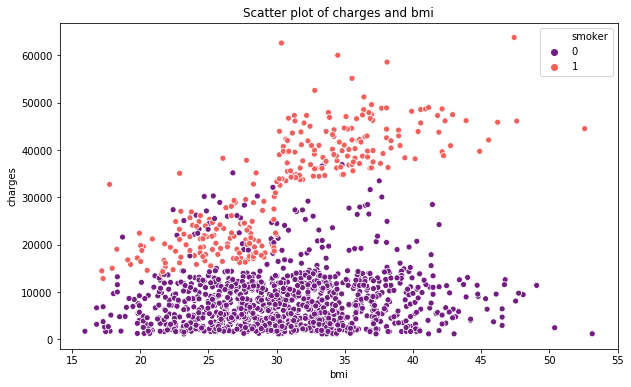

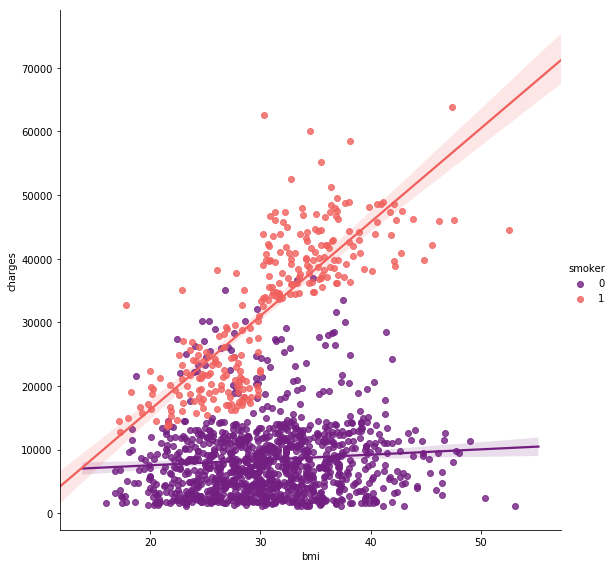

In [41]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=hi,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=hi, palette = 'magma', size = 8)

Let's pay attention to children. First, let's see how many children our patients have.


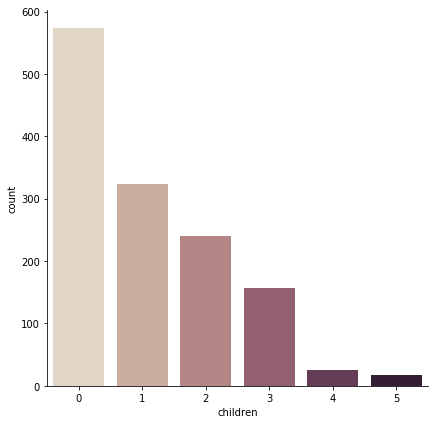

In [42]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=hi, size = 6)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

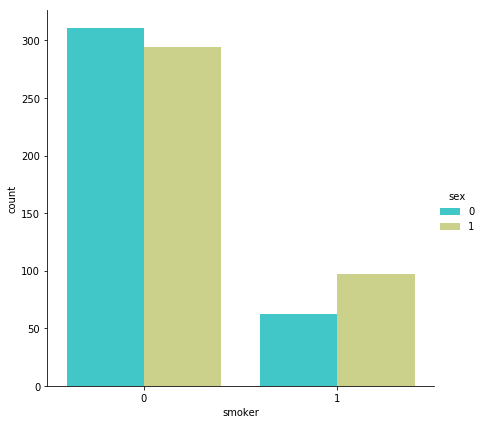

In [43]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=hi[(hi.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

going to predict the cost of treatment and start with linear regression.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [45]:
x = hi.drop(['charges'], axis = 1)
y = hi.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [46]:
X = hi.drop(['charges','region'], axis = 1)
Y = hi.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147238


model predicts well the cost of treatment of patients and creating two or three polynomial features,as the data set is so small

In [47]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3729086.094, MSE test data: 19933823.142
R2 train data: 0.974, R2 test data: 0.873


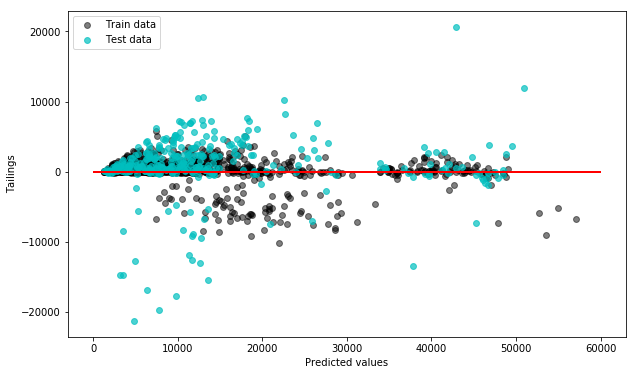

In [48]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

there is a noticeable retraining of the algorithm on the training data.